## ETL
==========================

#### Imports

In [1]:
import requests
import pandas as pd
import json
pd.reset_option('display.max_rows', None)
pd.set_option('display.max_rows', None)

####  API key, urls, JSON

In [2]:
api_key = '746bed3342e20518ff645c2e6b0e3bec34de94a1'
get = 'GEO_ID,GEO_ID_F,NAME,GEOCOMP,NAICS2017,NAICS2017_F,NAICS2017_LABEL,INDGROUP,INDLEVEL,SECTOR,SUBSECTOR,OWNCHAR,OWNCHAR_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_VET,OWNER_VET_LABEL,OWNPDEMP,OWNPDEMP_F,QDESC,QDESC_LABEL,STATE'
url = f'https://api.census.gov/data/2018/abscbo?get={get}&for=us:*&key={api_key}'
url_state = f'https://api.census.gov/data/2018/abscbo?get={get}&for=state:*&key={api_key}'

In [3]:
r = requests.get(url)
# print(r)
r_state = requests.get(url_state)
# print(r_state)


In [4]:
r = r.json()
r = json.dumps(r)

r_state = r_state.json()
r_state = json.dumps(r_state)

#### Examine table (country data)

In [ ]:
p = pd.read_json(r)
p.info()
p.head(10)

#### Promote First Row as Column Headers, Remove Unnecessary Columns (country data)

In [6]:
# country data edit columns

headers = p.iloc[0]
#promote first row as column headers
new_p = pd.DataFrame(p.values[1:], columns=headers)
#remove unnecessary columns
new_p = new_p.drop(columns = ['GEO_ID','GEO_ID_F','NAME','GEOCOMP','NAICS2017','NAICS2017_F','INDGROUP','INDLEVEL','SECTOR', 'SUBSECTOR','OWNCHAR','OWNER_ETH','OWNER_RACE', 'OWNPDEMP', 'OWNER_SEX','OWNER_VET','OWNPDEMP_F','QDESC','us'])

#### Verify Changes

In [ ]:
# check
new_p.head()

#### Examine Table (state data)

In [ ]:
p_state = pd.read_json(r_state)
p_state.info()
p_state.head(10)

#### Promote Column Headers, Remove Unnecessary Columns, Verify Changes

In [ ]:
# state data edit columns

headers = p_state.iloc[0]
#promote first row as column headers
state_data = pd.DataFrame(p_state.values[1:], columns=headers)
#remove unnecessary columns
state_data = state_data.drop(columns = ['GEO_ID','GEO_ID_F','GEOCOMP','NAICS2017','NAICS2017_F', 'NAICS2017_LABEL','INDGROUP','INDLEVEL','SECTOR', 'SUBSECTOR','OWNCHAR','OWNER_ETH','OWNER_RACE','OWNER_SEX', 'OWNER_VET','OWNPDEMP', 'OWNPDEMP_F','QDESC','STATE', 'state'])

state_data.tail()

#### Rename Columns (country)

In [ ]:
country_data = new_p.rename({"NAICS2017_LABEL": "Industry",
                             "OWNCHAR_LABEL": "Responses",
                             "OWNER_ETH_LABEL": "Ethnicity",
                             "OWNER_RACE_LABEL": "Race",
                             "OWNER_SEX_LABEL": "Sex",
                             "OWNER_VET_LABEL": "Veteran Status",
                             "QDESC_LABEL": "Question Description",
                             "STATE": "State"},
                           axis = 'columns')
country_data.head()

#### Rename Columns (state)

In [ ]:
states_data = state_data.rename({"NAME": "State",
                                "OWNCHAR_LABEL": "Responses",
                                "OWNPDEMP": "Department",
                                "OWNER_ETH_LABEL": "Ethnicity",
                                "OWNER_RACE_LABEL": "Race",
                                "OWNER_SEX_LABEL": "Sex",
                                "OWNER_VET_LABEL": "Veteran Status",
                                "QDESC_LABEL": "Question Description"},
                               axis = 'columns')
states_data.tail()

#### Look at table characteristics
Both state and country

In [1]:
states_data.describe()

NameError: name 'states_data' is not defined

In [ ]:
country_data.describe()

#### Replace values in question description column for readability

In [ ]:
country_data["Question Description"] = country_data["Question Description"].replace(["YRACQBUS"],[ "Year Ownership Acquired"])
country_data["Question Description"] = country_data["Question Description"].replace(["PRIMINC"], ["Primary Income y/n"])
country_data["Question Description"] = country_data["Question Description"].replace(["EDUC"], ["Highest Educ. Level"])
country_data["Question Description"] = country_data["Question Description"].replace(["FLDEDUC"], ["Educ. Field"])
country_data["Question Description"] = country_data["Question Description"].replace(["OWNRAGE"], ["Age"])
country_data["Question Description"] = country_data["Question Description"].replace(["REASONOWN"], ["Reason for Owning"])
country_data["Question Description"] = country_data["Question Description"].replace(["PRIORBUSTAT"], ["Recent/Prior Owned Business Status"])
country_data["Question Description"] = country_data["Question Description"].replace(["DISVETRN"], ["Disabled Vet y/n"])
country_data["Question Description"] = country_data["Question Description"].replace(["VETSPECIFIC"], ["Specific Vet Chars."])
country_data["Question Description"] = country_data["Question Description"].replace(["USCITIZEN"], ["US Citizen y/n"])
country_data["Question Description"] = country_data["Question Description"].replace(["USBORN"], ["US Born y/n"])

states_data["Question Description"] = states_data["Question Description"].replace(["YRACQBUS"],[ "Year Ownership Acquired"])
states_data["Question Description"] = states_data["Question Description"].replace(["PRIMINC"], ["Primary Income y/n"])
states_data["Question Description"] = states_data["Question Description"].replace(["EDUC"], ["Highest Educ. Level"])
states_data["Question Description"] = states_data["Question Description"].replace(["FLDEDUC"], ["Educ. Field"])
states_data["Question Description"] = states_data["Question Description"].replace(["OWNRAGE"], ["Age"])
states_data["Question Description"] = states_data["Question Description"].replace(["REASONOWN"], ["Reason for Owning"])
states_data["Question Description"] = states_data["Question Description"].replace(["PRIORBUSTAT"], ["Recent/Prior Owned Business Status"])
states_data["Question Description"] = states_data["Question Description"].replace(["DISVETRN"], ["Disabled Vet y/n"])
states_data["Question Description"] = states_data["Question Description"].replace(["VETSPECIFIC"], ["Specific Vet Chars."])
states_data["Question Description"] = states_data["Question Description"].replace(["USCITIZEN"], ["US Citizen y/n"])
states_data["Question Description"] = states_data["Question Description"].replace(["USBORN"], ["US Born y/n"])



distinct_qs = country_data.drop_duplicates(subset=['Question Description'])
distinct_qs

#### Replace values in Responses column for readability
Both state & country

In [15]:
country_data["Responses"] = country_data["Responses"].replace(["Not a service-disabled veteran"], ["No"])
country_data["Responses"] = country_data["Responses"].replace(["Service-disabled veteran"], ["Yes"])
country_data["Responses"] = country_data["Responses"].replace(["Owner was born in the U.S."], ["Yes"])
country_data["Responses"] = country_data["Responses"].replace(["Owner was not born in the U.S."], ["No"])
country_data["Responses"] = country_data["Responses"].replace(["Owner is a citizen of the U.S."], ["Yes"])
country_data["Responses"] = country_data["Responses"].replace(["Owner is not a citizen of the U.S."], ["No"])

states_data["Responses"] = states_data["Responses"].replace(["Not a service-disabled veteran"], ["No"])
states_data["Responses"] = states_data["Responses"].replace(["Service-disabled veteran"], ["Yes"])
states_data["Responses"] = states_data["Responses"].replace(["Owner was born in the U.S."], ["Yes"])
states_data["Responses"] = states_data["Responses"].replace(["Owner was not born in the U.S."], ["No"])
states_data["Responses"] = states_data["Responses"].replace(["Owner is a citizen of the U.S."], ["Yes"])
states_data["Responses"] = states_data["Responses"].replace(["Owner is not a citizen of the U.S."], ["No"])              

#### Verify Changes
Swap commented out lines to check both.

In [ ]:
# distinct_ans_c = country_data.drop_duplicates(subset=["Responses"])
# distinct_ans_c
distinct_ans_s = states_data.drop_duplicates(subset=['Responses'])
distinct_ans_s

## Visualizations
==========================

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

#### Visualization 1 - Owner Gender by Industry
Used matplotlib to create horizontal bar chart showing number of owners by gender in each industry

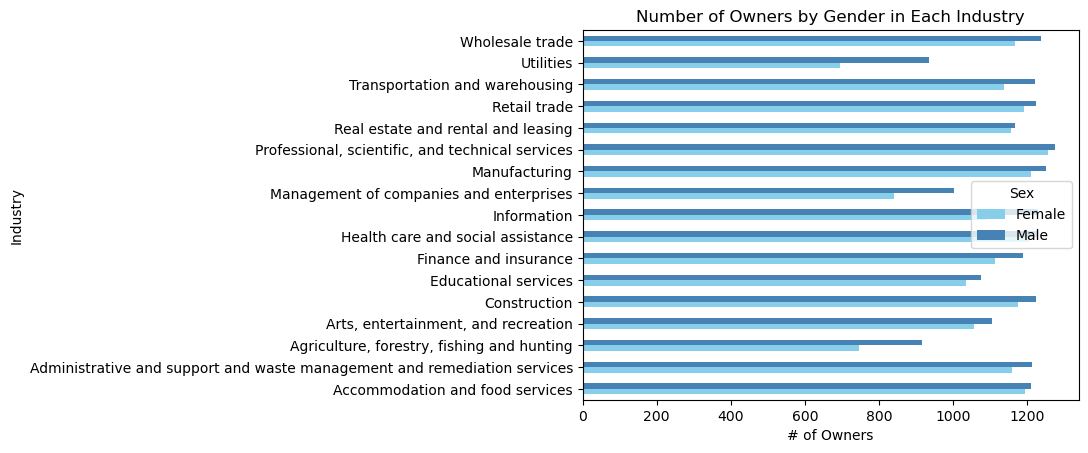

In [18]:
# Ensure total count for gender is not included
country_viz1 = country_data[country_data['Sex'].isin(['Female', 'Male'])]
# Ensure total count and unclassified for industry is not included
ind_viz1 = ['Wholesale trade', 'Utilities', 'Transportation and warehousing', 'Retail trade', 'Real estate and rental and leasing', 'Professional, scientific, and technical services', 'Other services (except public administration)' 'Mining, quarrying, and oil and gas extraction', 'Manufacturing', 'Management of companies and enterprises', 'Information', 'Health care and social assistance', 'Finance and insurance', 'Educational services', 'Construction', 'Arts, entertainment, and recreation', 'Agriculture, forestry, fishing and hunting', 'Administrative and support and waste management and remediation services', 'Accommodation and food services']
# new df variable for visualization 1
country_viz1 = country_viz1[country_viz1['Industry'].isin(ind_viz1)]
count_gen = country_viz1.groupby(['Industry', 'Sex'])['Sex'].size()
count_gen = count_gen.unstack(level=1)
# change colors, add axis labels
count_gen.plot.barh(color=['skyblue', 'steelblue'])
plt.xlabel('# of Owners')
plt.ylabel('Industry')
plt.title('Number of Owners by Gender in Each Industry')
plt.show()


#### Visualization 2
Used matplotlib to create stacked bar chart to show race distribution among owners in each industry

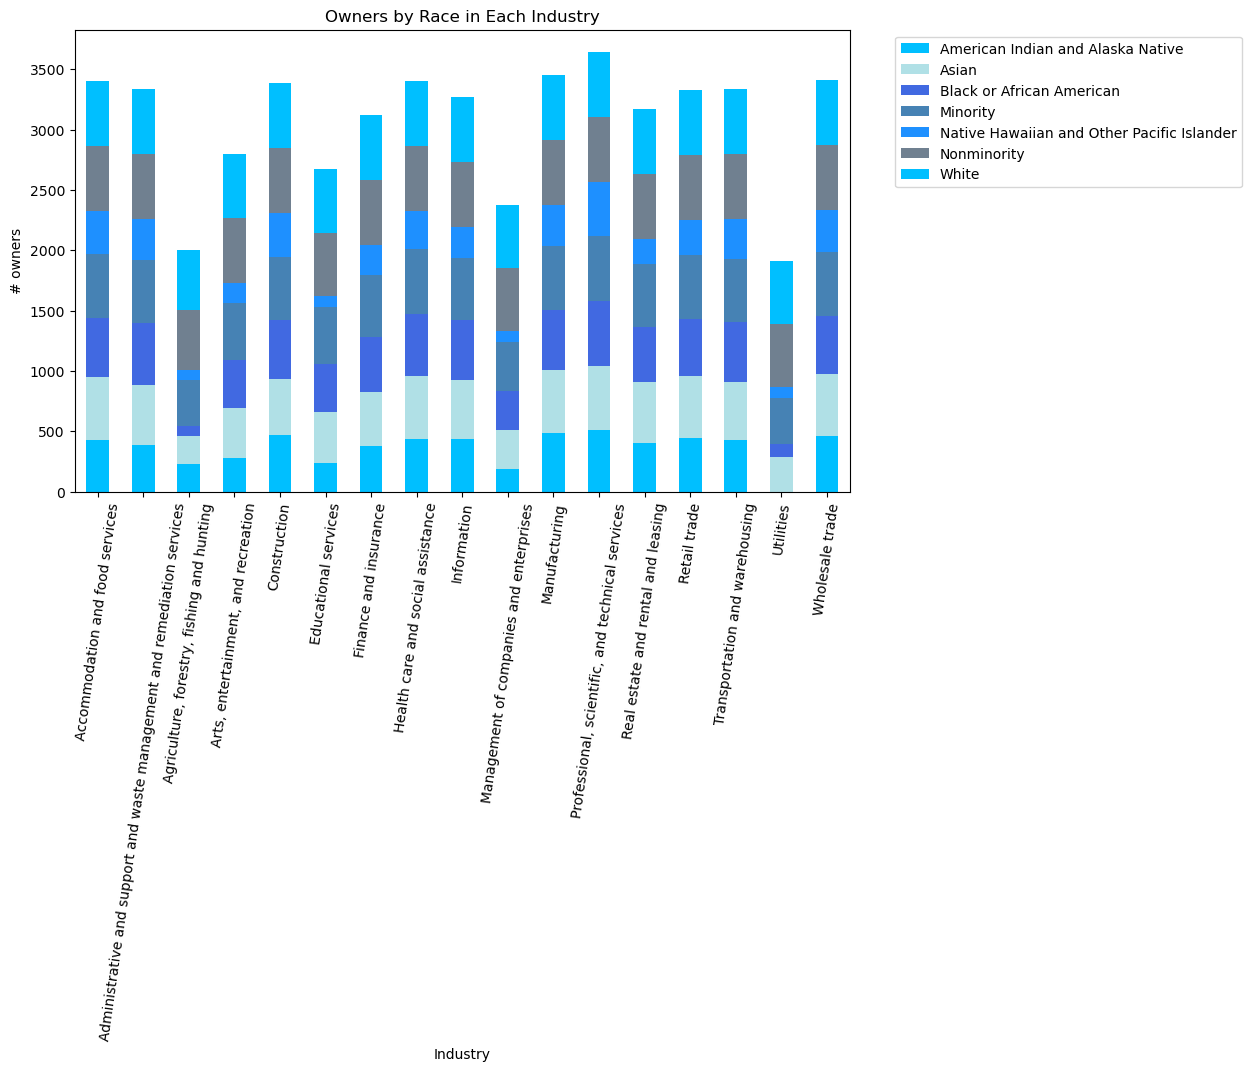

In [92]:
# Ensure total count for race is not included
country_viz2 = country_data[country_data['Race'].isin(['Black or African American', 'American Indian and Alaska Native', 'White', 'Nonminority', 'Asian', 'Native Hawaiian and Other Pacific Islander', 'Minority'])]
# Use ind_viz1 to ensure total count and unclassified for industry is not included
ind_viz2 = ind_viz1
# new df variable for visualization 1
country_viz2 = country_viz2[country_viz2['Industry'].isin(ind_viz2)]
count_race = country_viz2.groupby(['Industry', 'Race'])['Race'].size()
count_race = count_race.unstack(level=1)
# change colors, add axis labels
count_race.plot.bar(color=['deepskyblue', 'powderblue', 'royalblue', 'steelblue', 'dodgerblue', 'slategray'], stacked = True, width = 0.5, align = 'center', figsize = (10, 6))
plt.xlabel('Industry')
plt.ylabel('# owners')
plt.title('Owners by Race in Each Industry')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left')
plt.xticks(rotation=82)
plt.show()

C:\Users\ClaraMcGrath\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


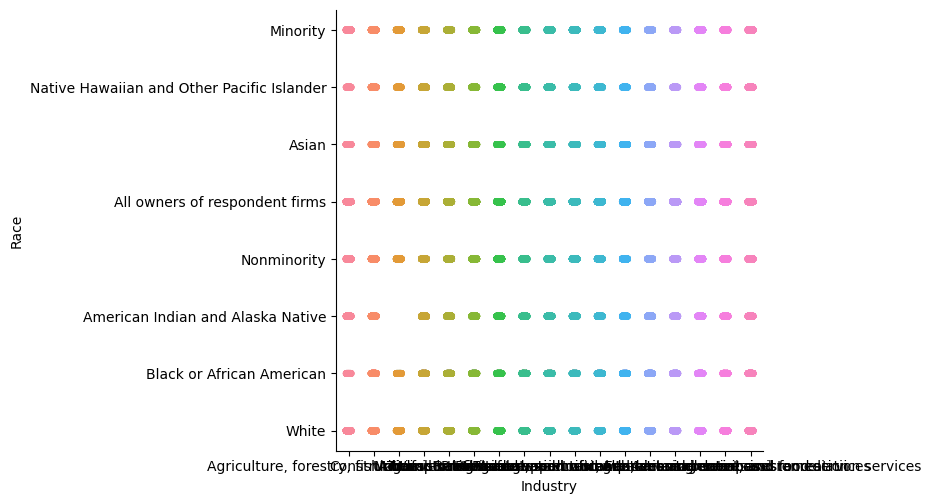

In [87]:
## editing this one will recommit
viz2 = country_data[country_data['Race'].isin(['Black or African American', 'American Indian and Alaska Native', 'White', 'Nonminority', 'Asian', 'Native Hawaiian and Other Pacific Islander', 'Minority'])]
viz2 = country_data[country_data['Industry'].isin(ind_viz1)]
sns.catplot(data = viz2, x = 'Industry', y = 'Race', kind = 'strip')
plt.show()